In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('measures_v2.csv')

In [3]:
print(sorted(df.profile_id.unique()))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 26, 27, 29, 30, 31, 32, 36, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81]


In [4]:
df_test = df[df.profile_id==81] # данные для тестовой выборки
df_train = df[df.profile_id!=81] # данные для трейн выборки

In [5]:
df_test

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
759312,-1.940790,24.743631,23.685831,1.109735,22.200928,0.208017,-2.002040,1.103881,24.243708,22.542758,23.520256,4.971873e-03,81
759313,0.061267,24.721631,23.677514,1.011419,22.213042,26.391552,-2.001441,0.058642,24.252124,22.518376,23.518006,-7.373598e-01,81
759314,4.869035,24.700827,23.677562,0.839013,22.216350,114.959876,-1.996960,-0.699983,24.246271,22.513729,23.519906,-1.275860e+00,81
759315,11.403643,24.685476,23.681716,0.836843,22.205915,249.357019,-2.075419,-2.092800,24.248455,22.495824,23.529679,-2.269425e+00,81
759316,19.176261,24.671343,23.681405,1.511877,22.196047,416.540609,-2.412571,-4.697710,24.255223,22.494463,23.524978,-4.132695e+00,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
776979,-0.662298,85.633569,81.572526,-0.673085,79.454299,-0.001426,-2.000589,1.095233,58.622086,80.292928,24.904142,-3.705492e-320,81
776980,-0.639878,85.625558,81.556430,-0.790497,79.456187,0.001091,-2.000754,1.097885,58.626926,80.322906,24.904809,-3.705492e-320,81
776981,-0.647135,85.614983,81.541998,-0.678542,79.454690,0.000334,-2.000000,1.097186,58.631781,80.334215,24.905987,-3.705492e-320,81
776982,-0.627400,85.616027,81.518069,-0.812512,79.453742,0.004046,-2.001122,1.096962,58.634744,80.324450,24.902054,-3.705492e-320,81


In [6]:
df_train

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,1.871008e-01,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,2.454175e-01,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,1.766153e-01,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,2.383027e-01,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,2.081967e-01,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330811,-2.152128,30.721298,45.274497,0.791801,41.934347,0.000380,-2.000169,1.097528,62.147780,38.653720,23.989078,-8.116730e-60,71
1330812,-2.258684,30.721306,45.239017,0.778900,41.868923,0.002985,-2.000499,1.097569,62.142646,38.656328,23.970700,-5.815891e-60,71
1330813,-2.130312,30.721312,45.211576,0.804914,41.804819,0.002301,-1.999268,1.098765,62.138387,38.650923,23.977234,-4.167268e-60,71
1330814,-2.268498,30.721316,45.193508,0.763091,41.762220,0.005662,-2.000999,1.095696,62.133422,38.655686,24.001421,-2.985978e-60,71


In [7]:
X_train = df_train.drop(['motor_speed','torque','stator_tooth','profile_id'],axis=1) # деление на признаки (и удаление некоторых признаков) и целевую переменную трейн данные
y_train = df_train['motor_speed']

In [8]:
X_test = df_test.drop(['motor_speed','torque','stator_tooth','profile_id'],axis=1) # деление на признаки (и удаление некоторых признаков) и целевую переменную тест данные
y_test = df_test['motor_speed']

In [9]:
cols = X_train.columns #масштабирование признаков
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

## Линейная регрессия

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() 
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

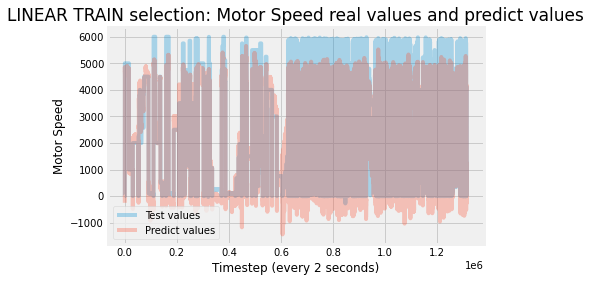

In [28]:
plt.title('LINEAR TRAIN selection: Motor Speed real values and predict values', fontsize=17)
plt.plot(np.array(y_train), alpha=0.3)
plt.plot(y_train_pred, alpha=0.3)
plt.xlabel("Timestep (every 2 seconds)")
plt.ylabel("Motor Speed")
plt.legend(['Test values','Predict values'])

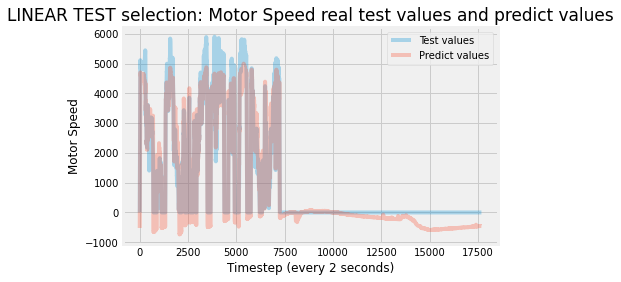

In [27]:
plt.title('LINEAR TEST selection: Motor Speed real test values and predict values', fontsize=17)
plt.plot(np.array(y_test), alpha=0.3)
plt.plot(y_test_pred, alpha=0.3)
plt.xlabel("Timestep (every 2 seconds)")
plt.ylabel("Motor Speed")
plt.legend(['Test values','Predict values'])

## KNN

In [19]:
from sklearn.neighbors import KNeighborsRegressor ##обучение модели

knn_n = KNeighborsRegressor(n_neighbors=2)

knn_n.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [22]:
y_train_pred_knn = knn_n.predict(X_train)
y_test_pred_knn = knn_n.predict(X_test)

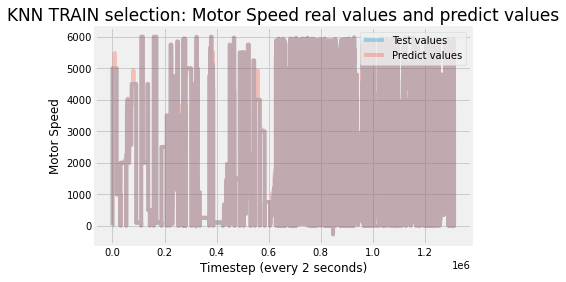

In [25]:
plt.title('KNN TRAIN selection: Motor Speed real values and predict values', fontsize=17)
plt.plot(np.array(y_train), alpha=0.3)
plt.plot(y_train_pred_knn, alpha=0.3)
plt.xlabel("Timestep (every 2 seconds)")
plt.ylabel("Motor Speed")
plt.legend(['Test values','Predict values'])

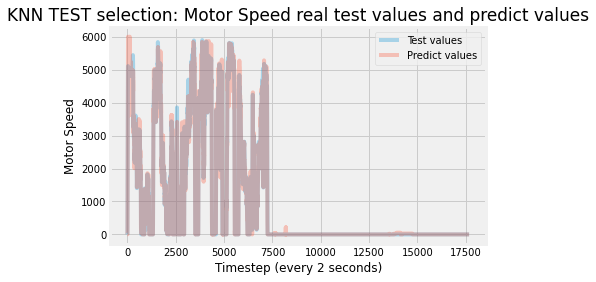

In [26]:
plt.title('KNN TEST selection: Motor Speed real test values and predict values', fontsize=17)
plt.plot(np.array(y_test), alpha=0.3)
plt.plot(y_test_pred_knn, alpha=0.3)
plt.xlabel("Timestep (every 2 seconds)")
plt.ylabel("Motor Speed")
plt.legend(['Test values','Predict values'])